In [4]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
import numpy as np
import mxnet as mx
from mxnet import nd, gluon, viz
from mxnet.gluon.data.vision import transforms

In [12]:
resnet18 = mx.sym.load("../not_end_to_end_model/resnet18_v1-symbol.json")

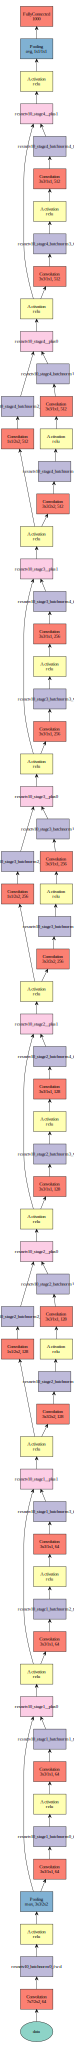

In [14]:
viz.plot_network(resnet18)

In [10]:
net2 = mx.gluon.model_zoo.vision.resnet18_v1(pretrained=True, ctx=mx.cpu())

In [55]:
inference_transforms = gluon.nn.HybridSequential()

In [56]:
inference_transforms.add(transforms.Resize((224, 224)))
inference_transforms.add(transforms.ToTensor())
inference_transforms.add(transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)))

In [57]:
end_to_end_model = gluon.nn.HybridSequential()
end_to_end_model.add(inference_transforms)
end_to_end_model.add(net2)

In [58]:
end_to_end_model.hybridize()

In [59]:
image = mx.nd.random.uniform(0, 255, (1, 256, 256, 3)).astype(dtype=np.uint8)

In [60]:
res = end_to_end_model(image)

In [61]:
res.shape

(1, 1000)

In [62]:
end_to_end_model.export("resnet18_end_to_end")

In [65]:
resnet18_end_to_end = mx.sym.load("resnet18_end_to_end-symbol.json")

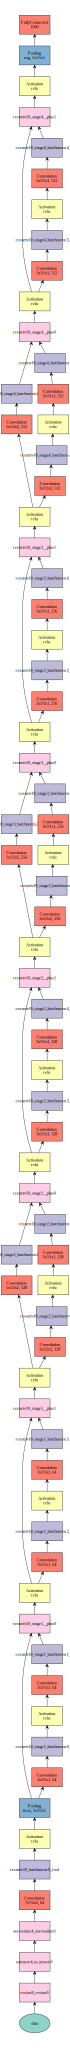

In [66]:
viz.plot_network(resnet18_end_to_end)